<a href="https://colab.research.google.com/github/MohebZandi/Comupter_Vision/blob/main/Convolution_1400_12_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COURSE: A deep understanding of deep learning
## SECTION: Convolution and transformations
### LECTURE: Convolution in code
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/dudl/?couponCode=202108

In [ ]:
# import libraries
import numpy as np

# convolution
from scipy.signal import convolve2d

# to read an image from a url
from imageio import imread

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

## Manual 2D convolution in numpy/scipy

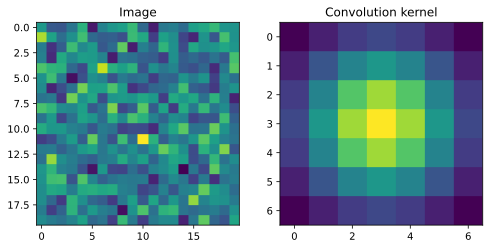

In [ ]:
# image
imgN = 20
image = np.random.randn(imgN,imgN)

# convolution kernel
kernelN = 7
Y,X = np.meshgrid(np.linspace(-3,3,kernelN),np.linspace(-3,3,kernelN))
kernel = np.exp( -(X**2+Y**2)/7 )


# let's see what they look like
fig,ax = plt.subplots(1,2,figsize=(8,6))
ax[0].imshow(image)
ax[0].set_title('Image')

ax[1].imshow(kernel)
ax[1].set_title('Convolution kernel')

plt.show()

In [ ]:
# Manually calculating the kernel

# now for the convolution
convoutput = np.zeros((imgN,imgN))
halfKr = kernelN//2

for rowi in range(halfKr,imgN-halfKr):
  for coli in range(halfKr,imgN-halfKr):

    # cut out a piece of the image
    pieceOfImg = image[rowi-halfKr:rowi+halfKr+1,:]      # get the rows
    pieceOfImg = pieceOfImg[:,coli-halfKr:coli+halfKr+1] # extract the columns

    # dot product: element-wise multiply and sum (and flip the kernel for "real convolution")
    dotprod = np.sum( pieceOfImg*kernel[::-1,::-1] )

    # store the result for this pixel
    convoutput[rowi,coli] = dotprod

In [ ]:
# using scipy
convoutput2 = convolve2d(image,kernel,mode='valid')

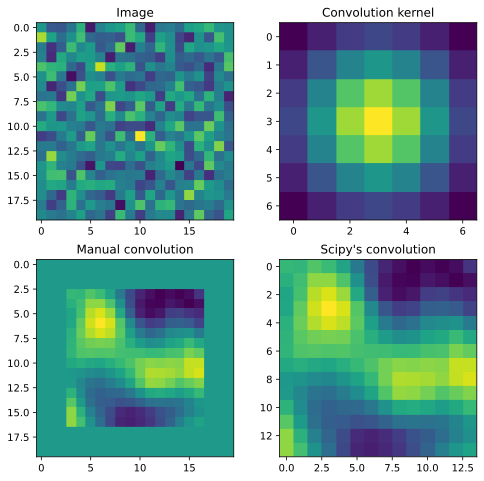

In [ ]:
fig,ax = plt.subplots(2,2,figsize=(8,8))

ax[0,0].imshow(image)
ax[0,0].set_title('Image')

ax[0,1].imshow(kernel)
ax[0,1].set_title('Convolution kernel')

ax[1,0].imshow(convoutput)
ax[1,0].set_title('Manual convolution')

ax[1,1].imshow(convoutput2)
ax[1,1].set_title("Scipy's convolution")

plt.show()

## Examples of convolution with different kernels in a real image

(1675, 3000, 3)
(1675, 3000)


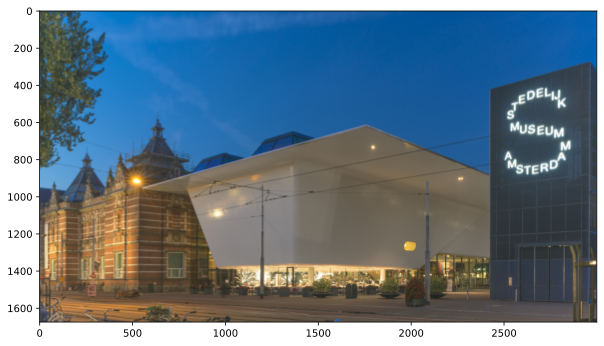

In [ ]:
# read a pic from the web
bathtub = imread('https://upload.wikimedia.org/wikipedia/commons/6/61/De_nieuwe_vleugel_van_het_Stedelijk_Museum_Amsterdam.jpg')

# check the size
print(bathtub.shape)

# let's see what the famous Bathtub Museum looks like
fig = plt.figure(figsize=(10,6))
plt.imshow(bathtub);

# transform image to 2D for convenience (not necessary for convolution!)
bathtub = np.mean(bathtub,axis=2)
bathtub = bathtub/np.max(bathtub)

# check the size again
print(bathtub.shape)

In [ ]:
# hand-craft two convolution kernels

# vertical kernel
VK = np.array([ [1,0,-1],
                [1,0,-1],
                [1,0,-1] ])

# horizontal kernel
HK = np.array([ [ 1, 1, 1],
                [ 0, 0, 0],
                [-1,-1,-1] ])

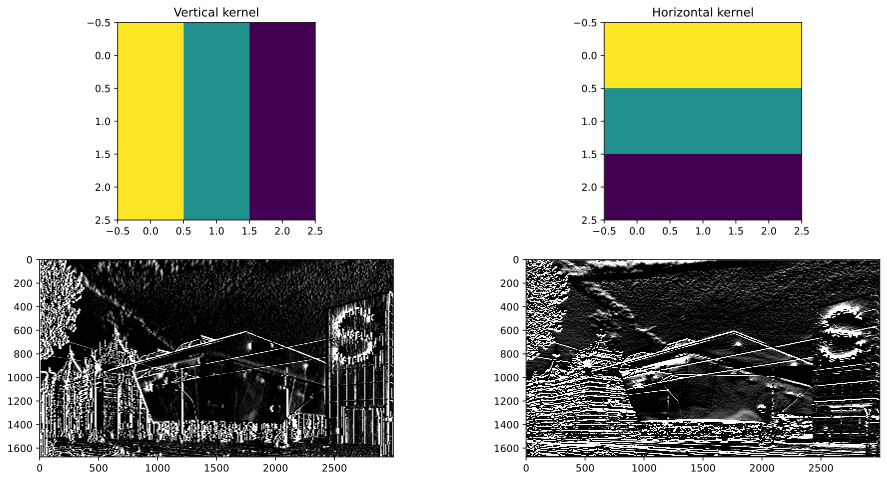

In [ ]:
fig,ax = plt.subplots(2,2,figsize=(16,8))

ax[0,0].imshow(VK)
ax[0,0].set_title('Vertical kernel')

ax[0,1].imshow(HK)
ax[0,1].set_title('Horizontal kernel')


# run convolution and show the result
convres = convolve2d(bathtub,VK,mode='same')
ax[1,0].imshow(convres,cmap='gray',vmin=0,vmax=.01)

convres = convolve2d(bathtub,HK,mode='same')
ax[1,1].imshow(convres,cmap='gray',vmin=0,vmax=.01)

plt.show()

## Now in PyTorch

In [ ]:
# first, translate everything into a tensor
import torch
import torch.nn.functional as F

# convert and reshape the kernels   ------> view(number of images in a batch, number of channels, height, width of image)
VK_t = torch.tensor(VK).view(1,1,3,3).double()     # 4 dimensional tensors
HK_t = torch.tensor(HK).view(1,1,3,3).double()
bathtub_t = torch.tensor(bathtub).view(1,1,bathtub.shape[0],bathtub.shape[1])

print(VK_t.shape)
print(bathtub_t.shape)

torch.Size([1, 1, 3, 3])
torch.Size([1, 1, 1675, 3000])


In [ ]:
C = F.conv2d(bathtub_t,VK_t)     # there are also conv1d and conv3d
print(C.shape)

torch.Size([1, 1, 1673, 2998])


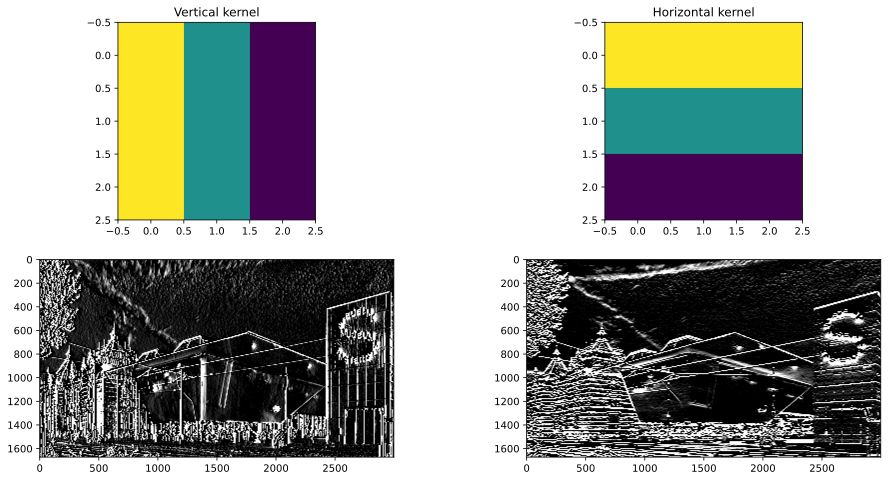

In [ ]:
fig,ax = plt.subplots(2,2,figsize=(16,8))

ax[0,0].imshow(VK)
ax[0,0].set_title('Vertical kernel')

ax[0,1].imshow(HK)
ax[0,1].set_title('Horizontal kernel')


# run convolution and show the result
convres = F.conv2d(bathtub_t,VK_t)
img = torch.squeeze(convres.detach())    # convert the 4 dimension array to 2 dimension for show in matplotlib
ax[1,0].imshow(img,cmap='gray',vmin=0,vmax=.01)

convres = F.conv2d(bathtub_t,HK_t)
img = torch.squeeze(convres.detach())    # convert the 4 dimension array to 2 dimension for show in matplotlib
ax[1,1].imshow(img,cmap='gray',vmin=0,vmax=.01)

plt.show()

# COURSE: A deep understanding of deep learning
## SECTION: Convolution and transformations
### LECTURE: The Conv2 class in PyTorch
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/dudl/?couponCode=202108

In [1]:
# import libraries
import numpy as np
import torch
import torch.nn as nn

import matplotlib.pyplot as plt

## Create a convolution instance

In [3]:
# create a conv2d class instance with parameters

# parameters
inChans  = 3     # RGB
outChans = 15    # using kernel size of 5x5 and produce 15 feature maps
krnSize  = 5     # should be an odd number
stride   = 1     # Not to jump over the pixels
padding  = 0     # Not to use padding rows and cols

# create the instance (cf nn.Linear)
c = nn.Conv2d(inChans,outChans,krnSize,stride,padding)

# let's have a look at it
print(c)
print(' ')

# check out its weight tensor; what are the dimensions?
print( 'Size of weights: ' + str(c.weight.shape) )   # The output is (number of output, number of input channels, kernel size, kernel size)
print( 'Size of bias: ' + str(c.bias.shape) )        # What do these kernels look like?



Conv2d(3, 15, kernel_size=(5, 5), stride=(1, 1))
 
Size of weights: torch.Size([15, 3, 5, 5])
Size of bias: torch.Size([15])


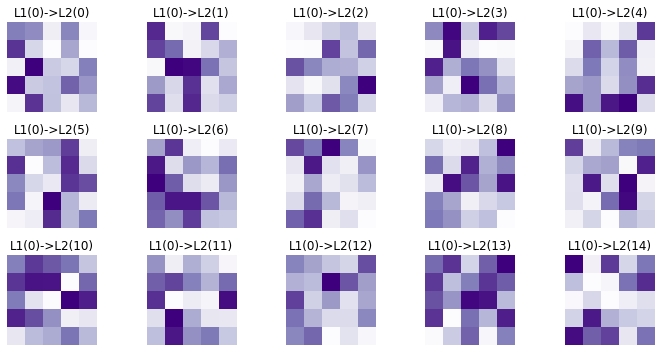

In [4]:
# What do these kernels look like?

fig,axs = plt.subplots(3, 5, figsize=(10,5))

for i,ax in enumerate(axs.flatten()):
  ax.imshow(torch.squeeze(c.weight[i,0,:,:]).detach(),cmap='Purples')  # getting the ith filter weights with first channel color
  ax.set_title('L1(0)->L2(%s)'%i)
  ax.axis('off')

plt.tight_layout()
plt.show()

## Convolve with an image

torch.Size([1, 3, 64, 64])
(64, 64, 3, 1)


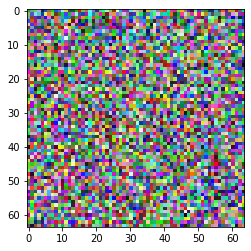

In [5]:
# size of the image (N, RGB, width, height)
imsize = (1, 3, 64, 64)   # (1 image per batch, 3 channels for RGB, 64 pixels for height, 64 pixels for width)

img = torch.rand(imsize)

# pytorch wants channels first, but matplotlib wants channels last.
# therefore, tensors must be permuted to visualize
img2view = img.permute(2,3,1,0).numpy()   # permute will change the place of contents of tuple and make a new series
  # it will change (1, 3, 64, 64)  to -------> (64, 64, 3, 1)

print(img.shape)
print(img2view.shape)

plt.imshow(np.squeeze(img2view));

In [6]:
# convolve the image with the filter bank (set of 'outChans' kernels)
convRes = c(img)

print(img.shape)
print(convRes.shape)  # (number of image, number of feature maps, size of result, size of result)


torch.Size([1, 3, 64, 64])
torch.Size([1, 15, 60, 60])


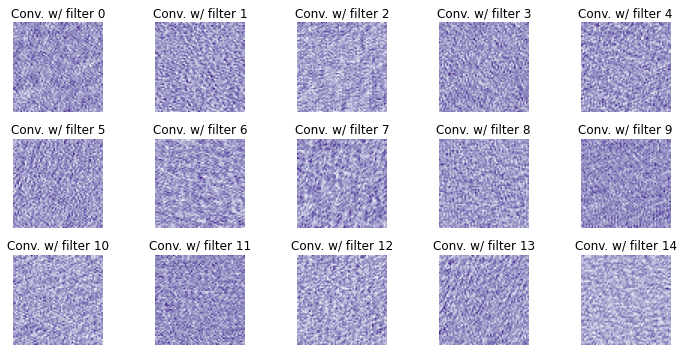

In [7]:
# What do the convolved images look like? (Hint: think of the bathtub picture.)

fig,axs = plt.subplots(3,5,figsize=(10,5))

for i,ax in enumerate(axs.flatten()):

  # extract this "layer" of the convolution result
  I = torch.squeeze(convRes[0,i,:,:]).detach()

  # and visualize it
  ax.imshow(I,cmap='Purples')
  ax.set_title('Conv. w/ filter %s'%i)
  ax.axis('off')

plt.tight_layout()
plt.show()

# End Line